In [0]:
import re
import pandas as pd
import datetime as dt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/gdrive',force_remount= True)

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [3]:
df_tweets = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Text Analytics/Project/Clean_MDS_Tweets.csv')
df_tweets['text'] = df_tweets['text'].fillna('NA')
df_tweets.shape


(50855, 3)

In [4]:
df_tweets.head(5)

,timestamp,text,date
0,10/27/2019 23:59,ams adds laser detection auto-focus that sees ...,10/27/2019
1,10/27/2019 23:59,Check out Pollix Watch - the prime health & fi...,10/27/2019
2,10/27/2019 23:49,Fii iFever Bluetooth Intelligent Thermometer B...,10/27/2019
3,10/27/2019 23:43,Stylish! Pierced look & comfortable Triangle i...,10/27/2019
4,10/27/2019 23:42,I really enjoyed all the discussions today at ...,10/27/2019


In [0]:
# import spacy
# from spacy import displacy
# from collections import Counter
# import en_core_web_sm
# nlp = en_core_web_sm.load()

In [0]:
# doc = nlp('European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices')
# print([(X.text, X.label_) for X in doc.ents])

[('European', 'NORP'), ('Google', 'ORG'), ('$5.1 billion', 'MONEY'), ('Wednesday', 'DATE')]


In [0]:
# #https://towardsdatascience.com/named-entity-recognition-with-nltk-and-spacy-8c4a7d88e7da

# def getentities(s):
#   doc = nlp(s)
#   lst = [(X.text, X.label_) for X in doc.ents]
#   entity= []
#   for i in lst:
#     if i[1] == 'ORG':
#       entity.append(i[0])
#   return entity


# df_tweets['entities'] = df_tweets['text'].map(getentities)

In [0]:
# df_tweets['entities'].head(5)

0                                                []
1                                         [POLLIX®]
2    [Fii iFever Bluetooth Intelligent Thermometer]
3                                        [Triangle]
4                                             [EMA]
Name: entities, dtype: object

In [0]:
# entities_recognized = list(set(df_tweets['entities'].sum()))

In [0]:
# wordcounts = pd.Series(df_tweets['entities'].sum()).value_counts()
# wordfrequency = pd.DataFrame(wordcounts)
# wordfrequency.reset_index(inplace= True)
# wordfrequency.columns = ["Entities","Count"]
# wordfrequency.head(5)

,Entities,Count
0,Google,5270
1,Fitbit,3315
2,Apple,2149
3,Apple Watch,1005
4,Android,624


In [0]:
# wordfrequency.to_csv('/content/gdrive/My Drive/Colab Notebooks/Text Analytics/Project/Entities_frequency.csv')

In [5]:
df_tweets.shape

(50855, 3)

In [6]:
import nltk
nltk.download('stopwords')
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize 
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [7]:
cleaned_desc = []

cntr = 0



for i in range(len(df_tweets)):
  cntr = cntr+1
  if cntr == 5000:
    print('Number of rows read until now:',i+1)
    cntr = 0

  try:
    new_words = []
    body = df_tweets['text'][i]
    words = word_tokenize(body)
    for w in words:
      w = w.lstrip().rstrip().lower()
      new_words.append(w)
#    words = w.lstrip().rstrip().lower()
    filtered_words = [w for w in new_words if not w in stop_words]
    filtered_words = [w for w in filtered_words if len(w) > 1]

    cleaned_desc.append(filtered_words)
  except:
    cleaned_desc.append('')


Number of rows read until now: 5000
Number of rows read until now: 10000
Number of rows read until now: 15000
Number of rows read until now: 20000
Number of rows read until now: 25000
Number of rows read until now: 30000
Number of rows read until now: 35000
Number of rows read until now: 40000
Number of rows read until now: 45000
Number of rows read until now: 50000


In [8]:
import string

def cleanwords(l):
  cleaned_l = []
  for w in l:
    w = w.lstrip()
    w = w.rstrip()
    w = w.lower()
    w = w.translate(str.maketrans('','',string.punctuation))
    cleaned_l.append(w)
  return cleaned_l
  



df_tweets['Cleaned'] = pd.Series(cleaned_desc)
print(df_tweets.head(5))

df_tweets['Cleaned'] = df_tweets['Cleaned'].map(cleanwords)
print(df_tweets.head(5))

          timestamp  ...                                            Cleaned
0  10/27/2019 23:59  ...  [ams, adds, laser, detection, auto-focus, sees...
1  10/27/2019 23:59  ...  [check, pollix, watch, prime, health, fitness,...
2  10/27/2019 23:49  ...  [fii, ifever, bluetooth, intelligent, thermome...
3  10/27/2019 23:43  ...  [stylish, pierced, look, comfortable, triangle...
4  10/27/2019 23:42  ...  [really, enjoyed, discussions, today, intensiv...

[5 rows x 4 columns]
          timestamp  ...                                            Cleaned
0  10/27/2019 23:59  ...  [ams, adds, laser, detection, autofocus, sees,...
1  10/27/2019 23:59  ...  [check, pollix, watch, prime, health, fitness,...
2  10/27/2019 23:49  ...  [fii, ifever, bluetooth, intelligent, thermome...
3  10/27/2019 23:43  ...  [stylish, pierced, look, comfortable, triangle...
4  10/27/2019 23:42  ...  [really, enjoyed, discussions, today, intensiv...

[5 rows x 4 columns]


In [0]:
brands_list = ['google','fitbit','apple','samsung','garmin','xiaomi','motorola','fossil','sony','huawei','whoop']

In [0]:
def brandlist(l):
  brands = []
  try:
    for w in l:
      if w in brands_list:
        brands.append(w)
    brands = list(set(brands))
    return brands
  except:
    return brands


df_tweets['Brandlist'] = df_tweets['Cleaned'].map(brandlist)


In [28]:
df_tweets.head(5)

,timestamp,text,date,Cleaned,Brandlist,after_news
0,10/27/2019 23:59,ams adds laser detection auto-focus that sees ...,2019-10-27,"[ams, adds, laser, detection, autofocus, sees,...",[],0
1,10/27/2019 23:59,Check out Pollix Watch - the prime health & fi...,2019-10-27,"[check, pollix, watch, prime, health, fitness,...",[],0
2,10/27/2019 23:49,Fii iFever Bluetooth Intelligent Thermometer B...,2019-10-27,"[fii, ifever, bluetooth, intelligent, thermome...",[],0
3,10/27/2019 23:43,Stylish! Pierced look & comfortable Triangle i...,2019-10-27,"[stylish, pierced, look, comfortable, triangle...",[],0
4,10/27/2019 23:42,I really enjoyed all the discussions today at ...,2019-10-27,"[really, enjoyed, discussions, today, intensiv...",[],0


### Adding a feature with time flags

In [29]:
import datetime

## Adding a flag for dates
## Before the news (till 27th Oct) - the flag is 0
## During the peak period (28th Oct - 2nd Nov) - the flag is 1
## After the peak - the flag is 2

from datetime import datetime,date

def getdate(d):
  if type(d) == str:
    dt = d.split('/')
    return datetime(int(dt[2]), int(dt[0]),int(dt[1])).date()
  else:
    return d

df_tweets['date'] = df_tweets['date'].map(getdate)



def dateflag(d):
  if type(d) == float:
    return 0
  else:

    if d >= datetime(2019,10,28).date() and d <= datetime(2019,11,2).date() :
      return 1
    elif d >= datetime(2019,11,3).date():
      return 2
    else:
      return 0

df_tweets['after_news'] = df_tweets['date'].map(dateflag)

df_tweets['after_news'].value_counts()

2    19296
0    16930
1    14629
Name: after_news, dtype: int64

## **PRE PERIOD**



In [30]:
df_tweets_pre = df_tweets[df_tweets['after_news'] == 0]
df_tweets_pre.shape

(16930, 6)

Text(0.5, 1.0, 'Top 10 Brands')

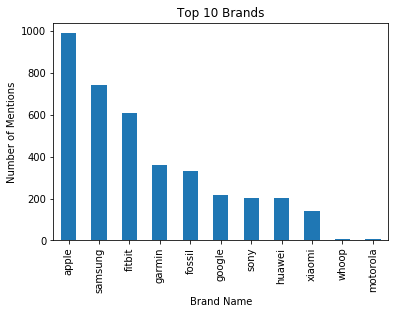

In [31]:
## Brands by frequency of mentions

brandcounts = pd.Series(df_tweets_pre['Brandlist'].sum()).value_counts()
brandcounts.plot(kind = 'bar')
plt.xlabel('Brand Name')
plt.ylabel('Number of Mentions')
plt.title('Top 10 Brands')

In [32]:
import itertools
from itertools import product

lst = brandcounts.index.tolist()

a = []
b = []

for i in lst:
  if len(i) > 0:
    a.append(i)
    b.append(i)

combinations = pd.DataFrame(itertools.product(a, b))
combinations.columns = ["Brand1","Brand2"]
combinations.head(5)

,Brand1,Brand2
0,apple,apple
1,apple,samsung
2,apple,fitbit
3,apple,garmin
4,apple,fossil


In [33]:
## Getting the individual Brand Occurences

def getcounts(s):
  counts = brandcounts[s]
  return counts


combinations['Brand1_occurence'] = combinations['Brand1'].map(getcounts)
combinations['Brand2_occurence'] = combinations['Brand2'].map(getcounts)
combinations.head(5)


,Brand1,Brand2,Brand1_occurence,Brand2_occurence
0,apple,apple,990,990
1,apple,samsung,990,743
2,apple,fitbit,990,610
3,apple,garmin,990,359
4,apple,fossil,990,330


In [34]:
## Getting the cooccurences

def getcooccurence(s):
  brands = s.split('&')
  cntr = 0
  if brands[0] != brands[1]:
    for lst in df_tweets_pre['Brandlist'].values.tolist():
      if brands[0] in lst and brands[1] in lst:
        cntr = cntr+1
    return cntr

combinations['Brand1&Brand2'] = combinations['Brand1']+'&'+combinations['Brand2']
combinations['Cooccurence'] = combinations['Brand1&Brand2'].map(getcooccurence)
combinations.head(5)

,Brand1,Brand2,Brand1_occurence,Brand2_occurence,Brand1&Brand2,Cooccurence
0,apple,apple,990,990,apple&apple,NaN
1,apple,samsung,990,743,apple&samsung,151.0
2,apple,fitbit,990,610,apple&fitbit,89.0
3,apple,garmin,990,359,apple&garmin,30.0
4,apple,fossil,990,330,apple&fossil,26.0


In [35]:
## Calculating the lift

combinations['Lift'] = (df_tweets_pre.shape[0] * combinations['Cooccurence'])/(combinations['Brand1_occurence']*combinations['Brand2_occurence'])
combinations.head(5)

,Brand1,Brand2,Brand1_occurence,Brand2_occurence,Brand1&Brand2,Cooccurence,Lift
0,apple,apple,990,990,apple&apple,NaN,NaN
1,apple,samsung,990,743,apple&samsung,151.0,3.475441
2,apple,fitbit,990,610,apple&fitbit,89.0,2.495065
3,apple,garmin,990,359,apple&garmin,30.0,1.429054
4,apple,fossil,990,330,apple&fossil,26.0,1.347352


In [36]:
combinations.sort_values(by = 'Lift',ascending=False)

,Brand1,Brand2,Brand1_occurence,Brand2_occurence,Brand1&Brand2,Cooccurence,Lift
98,xiaomi,motorola,143,6,xiaomi&motorola,2.0,39.463869
118,motorola,xiaomi,6,143,motorola&xiaomi,2.0,39.463869
76,sony,motorola,205,6,sony&motorola,1.0,13.764228
117,motorola,huawei,6,205,motorola&huawei,1.0,13.764228
116,motorola,sony,6,205,motorola&sony,1.0,13.764228
...,...,...,...,...,...,...,...
72,sony,sony,205,205,sony&sony,NaN,NaN
84,huawei,huawei,205,205,huawei&huawei,NaN,NaN
96,xiaomi,xiaomi,143,143,xiaomi&xiaomi,NaN,NaN
108,whoop,whoop,6,6,whoop&whoop,NaN,NaN


In [37]:
## Getting in Matrix Format for Lifts

brands = list(combinations['Brand1'].unique())
df_lifts = pd.DataFrame(index=brands, columns=brands)
for i in brands:
  for j in brands:
    x = combinations[combinations['Brand1'] == i]
    value = x[x['Brand2'] == j]['Lift'].values[0]
    df_lifts[i].loc[j] = value
 
df_lifts.iloc[:10,:10]

,apple,samsung,fitbit,garmin,fossil,google,sony,huawei,xiaomi,whoop
apple,NaN,3.47544,2.49507,1.42905,1.34735,2.3426,0.583937,1.33471,3.10927,2.85017
samsung,3.47544,NaN,1.75564,4.1256,1.38097,3.12137,2.11187,2.66763,3.98357,0
fitbit,2.49507,1.75564,NaN,3.09238,1.26155,1.6475,0.812315,0.270772,3.29944,0
garmin,1.42905,4.1256,3.09238,NaN,0.428716,1.72269,0.230043,0.460086,4.61694,0
fossil,1.34735,1.38097,1.26155,0.428716,NaN,2.3426,0,0,1.07629,0
google,2.3426,3.12137,1.6475,1.72269,2.3426,NaN,1.13131,0.377102,3.78421,0
sony,0.583937,2.11187,0.812315,0.230043,0,1.13131,NaN,2.01428,1.15504,0
huawei,1.33471,2.66763,0.270772,0.460086,0,0.377102,2.01428,NaN,6.35272,0
xiaomi,3.10927,3.98357,3.29944,4.61694,1.07629,3.78421,1.15504,6.35272,NaN,0
whoop,2.85017,0,0,0,0,0,0,0,0,NaN


In [38]:
## Getting in Matrix Format for MDS


brands = list(combinations['Brand1'].unique())
df = pd.DataFrame(index=brands, columns=brands)
for i in brands:
  for j in brands:
    x = combinations[combinations['Brand1'] == i]
    value = 1/(x[x['Brand2'] == j]['Lift'].values[0])
    if value == float("inf"):
      value = 0
    elif np.isnan(value):
      value = 0
    df[i].loc[j] = value
 
df.iloc[:10,:10]

,apple,samsung,fitbit,garmin,fossil,google,sony,huawei,xiaomi,whoop
apple,0,0.287733,0.400791,0.699764,0.742196,0.426875,1.71251,0.749225,0.321618,0.350856
samsung,0.287733,0,0.569592,0.242389,0.724129,0.320372,0.473513,0.374865,0.251031,0
fitbit,0.400791,0.569592,0,0.323376,0.792676,0.606979,1.23105,3.69315,0.303082,0
garmin,0.699764,0.242389,0.323376,0,2.33255,0.580486,4.34702,2.17351,0.216594,0
fossil,0.742196,0.724129,0.792676,2.33255,0,0.426875,0,0,0.92912,0
google,0.426875,0.320372,0.606979,0.580486,0.426875,0,0.883934,2.6518,0.264256,0
sony,1.71251,0.473513,1.23105,4.34702,0,0.883934,0,0.496456,0.865771,0
huawei,0.749225,0.374865,3.69315,2.17351,0,2.6518,0.496456,0,0.157413,0
xiaomi,0.321618,0.251031,0.303082,0.216594,0.92912,0.264256,0.865771,0.157413,0,0
whoop,0.350856,0,0,0,0,0,0,0,0,0


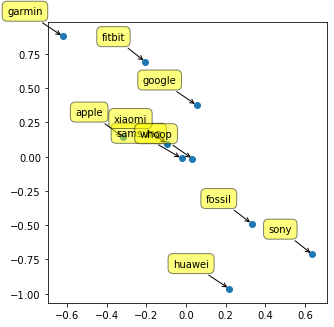

In [45]:

#https://datascience.stackexchange.com/questions/49316/multidimensional-scaling-producing-different-results-for-different-seeds

from sklearn import manifold

df_new = df.iloc[:10,:10]

#df_new = df
mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=11)
results = mds.fit(df_new.values)

brands = df_new.columns
coords = results.embedding_

fig = plt.figure(figsize=(5,5))

plt.subplots_adjust(bottom = 0.1)
plt.scatter(coords[:, 0], coords[:, 1])

for label, x, y in zip(brands, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')
    )
plt.show()

## **DURING PEAK**


In [46]:
df_tweets_peak = df_tweets[df_tweets['after_news'] == 1]
df_tweets_peak.shape

(14629, 6)

Text(0.5, 1.0, 'Top 10 Brands')

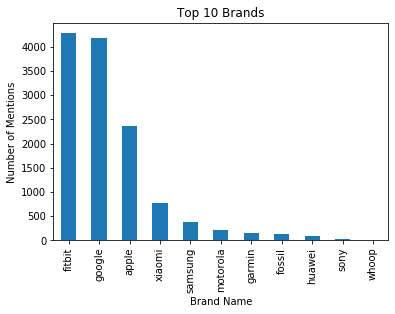

In [47]:
## Brands by frequency of mentions

brandcounts = pd.Series(df_tweets_peak['Brandlist'].sum()).value_counts()
brandcounts.plot(kind = 'bar')
plt.xlabel('Brand Name')
plt.ylabel('Number of Mentions')
plt.title('Top 10 Brands')

In [48]:
import itertools
from itertools import product

lst = brandcounts.index.tolist()

a = []
b = []

for i in lst:
  if len(i) > 0:
    a.append(i)
    b.append(i)

combinations = pd.DataFrame(itertools.product(a, b))
combinations.columns = ["Brand1","Brand2"]
combinations.head(5)

,Brand1,Brand2
0,fitbit,fitbit
1,fitbit,google
2,fitbit,apple
3,fitbit,xiaomi
4,fitbit,samsung


In [49]:
## Getting the individual Brand Occurences

def getcounts(s):
  counts = brandcounts[s]
  return counts


combinations['Brand1_occurence'] = combinations['Brand1'].map(getcounts)
combinations['Brand2_occurence'] = combinations['Brand2'].map(getcounts)
combinations.head(5)


,Brand1,Brand2,Brand1_occurence,Brand2_occurence
0,fitbit,fitbit,4279,4279
1,fitbit,google,4279,4183
2,fitbit,apple,4279,2357
3,fitbit,xiaomi,4279,782
4,fitbit,samsung,4279,376


In [50]:
## Getting the cooccurences

def getcooccurence(s):
  brands = s.split('&')
  cntr = 0
  if brands[0] != brands[1]:
    for lst in df_tweets_peak['Brandlist'].values.tolist():
      if brands[0] in lst and brands[1] in lst:
        cntr = cntr+1
    return cntr

combinations['Brand1&Brand2'] = combinations['Brand1']+'&'+combinations['Brand2']
combinations['Cooccurence'] = combinations['Brand1&Brand2'].map(getcooccurence)
combinations.head(5)

,Brand1,Brand2,Brand1_occurence,Brand2_occurence,Brand1&Brand2,Cooccurence
0,fitbit,fitbit,4279,4279,fitbit&fitbit,NaN
1,fitbit,google,4279,4183,fitbit&google,3735.0
2,fitbit,apple,4279,2357,fitbit&apple,605.0
3,fitbit,xiaomi,4279,782,fitbit&xiaomi,10.0
4,fitbit,samsung,4279,376,fitbit&samsung,57.0


In [51]:
## Calculating the lift

combinations['Lift'] = (df_tweets_peak.shape[0] * combinations['Cooccurence'])/(combinations['Brand1_occurence']*combinations['Brand2_occurence'])
combinations.head(5)

,Brand1,Brand2,Brand1_occurence,Brand2_occurence,Brand1&Brand2,Cooccurence,Lift
0,fitbit,fitbit,4279,4279,fitbit&fitbit,NaN,NaN
1,fitbit,google,4279,4183,fitbit&google,3735.0,3.052637
2,fitbit,apple,4279,2357,fitbit&apple,605.0,0.877542
3,fitbit,xiaomi,4279,782,fitbit&xiaomi,10.0,0.043719
4,fitbit,samsung,4279,376,fitbit&samsung,57.0,0.518274


In [52]:
combinations.sort_values(by = 'Lift',ascending=False)

,Brand1,Brand2,Brand1_occurence,Brand2_occurence,Brand1&Brand2,Cooccurence,Lift
53,samsung,sony,376,37,samsung&sony,10.0,10.515382
103,sony,samsung,37,376,sony&samsung,10.0,10.515382
97,huawei,sony,95,37,huawei&sony,2.0,8.323755
107,sony,huawei,37,95,sony&huawei,2.0,8.323755
92,huawei,samsung,95,376,huawei&samsung,17.0,6.962290
...,...,...,...,...,...,...,...
72,garmin,garmin,156,156,garmin&garmin,NaN,NaN
84,fossil,fossil,131,131,fossil&fossil,NaN,NaN
96,huawei,huawei,95,95,huawei&huawei,NaN,NaN
108,sony,sony,37,37,sony&sony,NaN,NaN


In [53]:
## Getting in Matrix Format for Lifts

brands = list(combinations['Brand1'].unique())
df_lifts = pd.DataFrame(index=brands, columns=brands)
for i in brands:
  for j in brands:
    x = combinations[combinations['Brand1'] == i]
    value = x[x['Brand2'] == j]['Lift'].values[0]
    df_lifts[i].loc[j] = value
 
df_lifts.iloc[:10,:10]

,fitbit,google,apple,xiaomi,samsung,motorola,garmin,fossil,huawei,sony
fitbit,NaN,3.05264,0.877542,0.0437185,0.518274,0.0773482,0.70129,1.38317,0.251911,0.184799
google,3.05264,NaN,0.90065,0.0491941,0.613879,0.110773,0.224183,1.22804,0.257692,0.0945203
apple,0.877542,0.90065,NaN,3.69857,2.03036,0.0561685,0.915078,0.947575,1.30666,1.34197
xiaomi,0.0437185,0.0491941,3.69857,NaN,0.796049,0.0846478,0.239835,0,1.96917,1.5168
samsung,0.518274,0.613879,2.03036,0.796049,NaN,1.0563,6.23508,1.188,6.96229,10.5154
motorola,0.0773482,0.110773,0.0561685,0.0846478,1.0563,NaN,0,0.505302,0.696785,1.78904
garmin,0.70129,0.224183,0.915078,0.239835,6.23508,0,NaN,5.01091,2.96134,5.06895
fossil,1.38317,1.22804,0.947575,0,1.188,0.505302,5.01091,NaN,4.70197,6.03631
huawei,0.251911,0.257692,1.30666,1.96917,6.96229,0.696785,2.96134,4.70197,NaN,8.32376
sony,0.184799,0.0945203,1.34197,1.5168,10.5154,1.78904,5.06895,6.03631,8.32376,NaN


In [54]:
## Getting in Matrix Format for MDS


brands = list(combinations['Brand1'].unique())
df = pd.DataFrame(index=brands, columns=brands)
for i in brands:
  for j in brands:
    x = combinations[combinations['Brand1'] == i]
    value = 1/(x[x['Brand2'] == j]['Lift'].values[0])
    if value == float("inf"):
      value = 0
    elif np.isnan(value):
      value = 0
    df[i].loc[j] = value
 
df.iloc[:10,:10]

,fitbit,google,apple,xiaomi,samsung,motorola,garmin,fossil,huawei,sony
fitbit,0,0.327586,1.13955,22.8736,1.92948,12.9286,1.42594,0.722975,3.96966,5.41127
google,0.327586,0,1.11031,20.3277,1.62899,9.0275,4.46065,0.814304,3.8806,10.5797
apple,1.13955,1.11031,0,0.270375,0.492524,17.8036,1.0928,1.05533,0.765312,0.745172
xiaomi,22.8736,20.3277,0.270375,0,1.2562,11.8137,4.16953,0,0.507827,0.659284
samsung,1.92948,1.62899,0.492524,1.2562,0,0.946704,0.160383,0.841753,0.143631,0.0950988
motorola,12.9286,9.0275,17.8036,11.8137,0.946704,0,0,1.97901,1.43516,0.558958
garmin,1.42594,4.46065,1.0928,4.16953,0.160383,0,0,0.199564,0.337685,0.197279
fossil,0.722975,0.814304,1.05533,0,0.841753,1.97901,0.199564,0,0.212677,0.165664
huawei,3.96966,3.8806,0.765312,0.507827,0.143631,1.43516,0.337685,0.212677,0,0.120138
sony,5.41127,10.5797,0.745172,0.659284,0.0950988,0.558958,0.197279,0.165664,0.120138,0


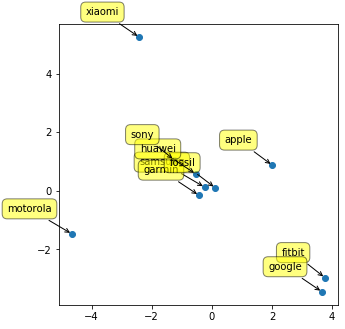

In [56]:

#https://datascience.stackexchange.com/questions/49316/multidimensional-scaling-producing-different-results-for-different-seeds

from sklearn import manifold

df_new = df.iloc[:10,:10]

#df_new = df
mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=11)
results = mds.fit(df_new.values)

brands = df_new.columns
coords = results.embedding_

fig = plt.figure(figsize=(5,5))

plt.subplots_adjust(bottom = 0.1)
plt.scatter(coords[:, 0], coords[:, 1])

for label, x, y in zip(brands, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))

plt.show()

## **After PEAK**


In [57]:
df_tweets_after = df_tweets[df_tweets['after_news'] == 2]
df_tweets_after.shape

(19296, 6)

Text(0.5, 1.0, 'Top 10 Brands')

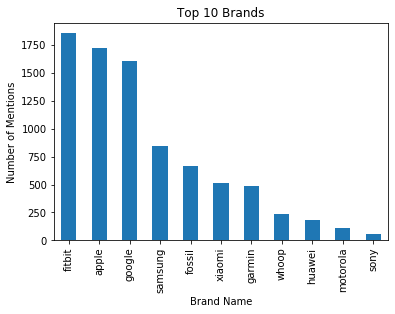

In [58]:
## Brands by frequency of mentions

brandcounts = pd.Series(df_tweets_after['Brandlist'].sum()).value_counts()
brandcounts.plot(kind = 'bar')
plt.xlabel('Brand Name')
plt.ylabel('Number of Mentions')
plt.title('Top 10 Brands')

In [59]:
import itertools
from itertools import product

lst = brandcounts.index.tolist()

a = []
b = []

for i in lst:
  if len(i) > 0:
    a.append(i)
    b.append(i)

combinations = pd.DataFrame(itertools.product(a, b))
combinations.columns = ["Brand1","Brand2"]
combinations.head(5)

,Brand1,Brand2
0,fitbit,fitbit
1,fitbit,apple
2,fitbit,google
3,fitbit,samsung
4,fitbit,fossil


In [60]:
## Getting the individual Brand Occurences

def getcounts(s):
  counts = brandcounts[s]
  return counts


combinations['Brand1_occurence'] = combinations['Brand1'].map(getcounts)
combinations['Brand2_occurence'] = combinations['Brand2'].map(getcounts)
combinations.head(5)


,Brand1,Brand2,Brand1_occurence,Brand2_occurence
0,fitbit,fitbit,1853,1853
1,fitbit,apple,1853,1726
2,fitbit,google,1853,1607
3,fitbit,samsung,1853,844
4,fitbit,fossil,1853,667


In [61]:
## Getting the cooccurences

def getcooccurence(s):
  brands = s.split('&')
  cntr = 0
  if brands[0] != brands[1]:
    for lst in df_tweets_after['Brandlist'].values.tolist():
      if brands[0] in lst and brands[1] in lst:
        cntr = cntr+1
    return cntr

combinations['Brand1&Brand2'] = combinations['Brand1']+'&'+combinations['Brand2']
combinations['Cooccurence'] = combinations['Brand1&Brand2'].map(getcooccurence)
combinations.head(5)

,Brand1,Brand2,Brand1_occurence,Brand2_occurence,Brand1&Brand2,Cooccurence
0,fitbit,fitbit,1853,1853,fitbit&fitbit,NaN
1,fitbit,apple,1853,1726,fitbit&apple,243.0
2,fitbit,google,1853,1607,fitbit&google,1258.0
3,fitbit,samsung,1853,844,fitbit&samsung,57.0
4,fitbit,fossil,1853,667,fitbit&fossil,22.0


In [62]:
## Calculating the lift

combinations['Lift'] = (df_tweets_after.shape[0] * combinations['Cooccurence'])/(combinations['Brand1_occurence']*combinations['Brand2_occurence'])
combinations.head(5)

,Brand1,Brand2,Brand1_occurence,Brand2_occurence,Brand1&Brand2,Cooccurence,Lift
0,fitbit,fitbit,1853,1853,fitbit&fitbit,NaN,NaN
1,fitbit,apple,1853,1726,fitbit&apple,243.0,1.466079
2,fitbit,google,1853,1607,fitbit&google,1258.0,8.151859
3,fitbit,samsung,1853,844,fitbit&samsung,57.0,0.703274
4,fitbit,fossil,1853,667,fitbit&fossil,22.0,0.343470


In [63]:
combinations.sort_values(by = 'Lift',ascending=False)

,Brand1,Brand2,Brand1_occurence,Brand2_occurence,Brand1&Brand2,Cooccurence,Lift
119,sony,motorola,57,111,sony&motorola,4.0,12.199147
109,motorola,sony,111,57,motorola&sony,4.0,12.199147
113,sony,samsung,57,844,sony&samsung,30.0,12.032926
43,samsung,sony,844,57,samsung&sony,30.0,12.032926
118,sony,huawei,57,182,sony&huawei,5.0,9.300174
...,...,...,...,...,...,...,...
72,garmin,garmin,491,491,garmin&garmin,NaN,NaN
84,whoop,whoop,239,239,whoop&whoop,NaN,NaN
96,huawei,huawei,182,182,huawei&huawei,NaN,NaN
108,motorola,motorola,111,111,motorola&motorola,NaN,NaN


In [64]:
## Getting in Matrix Format for Lifts

brands = list(combinations['Brand1'].unique())
df_lifts = pd.DataFrame(index=brands, columns=brands)
for i in brands:
  for j in brands:
    x = combinations[combinations['Brand1'] == i]
    value = x[x['Brand2'] == j]['Lift'].values[0]
    df_lifts[i].loc[j] = value
 
df_lifts.iloc[:10,:10]

,fitbit,apple,google,samsung,fossil,xiaomi,garmin,whoop,huawei,motorola
fitbit,NaN,1.46608,8.15186,0.703274,0.34347,0.302129,0.593839,0.348565,0.514948,0.281443
apple,1.46608,NaN,1.59311,2.58297,0.284937,3.11386,0.705841,0.935532,2.02707,0.402869
google,8.15186,1.59311,NaN,0.426806,0.522064,0.487731,0.171186,1.35649,0.527801,0.216351
samsung,0.703274,2.58297,0.426806,NaN,0.274214,0.795989,2.7938,0,5.27598,1.64775
fossil,0.34347,0.284937,0.522064,0.274214,NaN,0.223826,0.117839,0,0.317907,0
xiaomi,0.302129,3.11386,0.487731,0.795989,0.223826,NaN,0.304057,0,2.871,1.34497
garmin,0.593839,0.705841,0.171186,2.7938,0.117839,0.304057,NaN,0,0.215931,0
whoop,0.348565,0.935532,1.35649,0,0,0,0,NaN,0,0
huawei,0.514948,2.02707,0.527801,5.27598,0.317907,2.871,0.215931,0,NaN,3.82061
motorola,0.281443,0.402869,0.216351,1.64775,0,1.34497,0,0,3.82061,NaN


In [65]:
## Getting in Matrix Format for MDS


brands = list(combinations['Brand1'].unique())
df = pd.DataFrame(index=brands, columns=brands)
for i in brands:
  for j in brands:
    x = combinations[combinations['Brand1'] == i]
    value = 1/(x[x['Brand2'] == j]['Lift'].values[0])
    if value == float("inf"):
      value = 0
    elif np.isnan(value):
      value = 0
    df[i].loc[j] = value
 
df.iloc[:10,:10]

,fitbit,apple,google,samsung,fossil,xiaomi,garmin,whoop,huawei,motorola
fitbit,0,0.682092,0.122671,1.42192,2.91146,3.30984,1.68396,2.8689,1.94195,3.55312
apple,0.682092,0,0.627703,0.387152,3.50954,0.321145,1.41675,1.06891,0.493323,2.4822
google,0.122671,0.627703,0,2.34299,1.91547,2.05031,5.8416,0.737196,1.89465,4.62212
samsung,1.42192,0.387152,2.34299,0,3.64679,1.2563,0.357936,0,0.189538,0.606887
fossil,2.91146,3.50954,1.91547,3.64679,0,4.46775,8.48614,0,3.14557,0
xiaomi,3.30984,0.321145,2.05031,1.2563,4.46775,0,3.28886,0,0.348311,0.743509
garmin,1.68396,1.41675,5.8416,0.357936,8.48614,3.28886,0,0,4.63112,0
whoop,2.8689,1.06891,0.737196,0,0,0,0,0,0,0
huawei,1.94195,0.493323,1.89465,0.189538,3.14557,0.348311,4.63112,0,0,0.261738
motorola,3.55312,2.4822,4.62212,0.606887,0,0.743509,0,0,0.261738,0


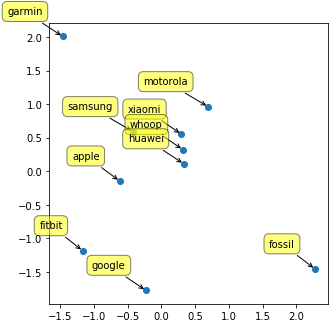

In [67]:

#https://datascience.stackexchange.com/questions/49316/multidimensional-scaling-producing-different-results-for-different-seeds

from sklearn import manifold

df_new = df.iloc[:10,:10]

#df_new = df
mds = manifold.MDS(n_components=2, dissimilarity="precomputed", random_state=11)
results = mds.fit(df_new.values)

brands = df_new.columns
coords = results.embedding_

fig = plt.figure(figsize=(5,5))

plt.subplots_adjust(bottom = 0.1)
plt.scatter(coords[:, 0], coords[:, 1])

for label, x, y in zip(brands, coords[:, 0], coords[:, 1]):
    plt.annotate(
        label,
        xy = (x, y), xytext = (-20, 20),
        textcoords = 'offset points', ha = 'right', va = 'bottom',
        bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
        arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0')

    )
plt.show()